In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('UsedCars.csv')
df.head(15)

,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021,6525000,1490cc,Automatic
1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012,1625000,1000cc,Manual
2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015,2550000,1300cc,Automatic
3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022,9000000,3500cc,Automatic
4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015,3350000,1300cc,Automatic
5,Nissan,PKR,Nissan March 2004 for sale in Karachi,Petrol,used,Nissan,"100,000 km",2004,1050000,1000cc,Automatic
6,Honda,PKR,Honda Civic 2021 for sale in Islamabad,Petrol,used,Honda,"20,500 km",2021,6275000,1800cc,Automatic
7,Suzuki,PKR,Suzuki Cultus 2008 for sale in Islamabad,Petrol,used,Suzuki,"25,025 km",2008,1025000,1000cc,Manual
8,Honda,PKR,Honda City 2018 for sale in Rawalpindi,Petrol,used,Honda,"88,000 km",2018,3150000,1300cc,Manual
9,Nissan,PKR,Nissan March 2004 for sale in Karachi,Petrol,used,Nissan,"100,000 km",2004,1050000,1000cc,Automatic


array([[<Axes: title={'center': 'model_date'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

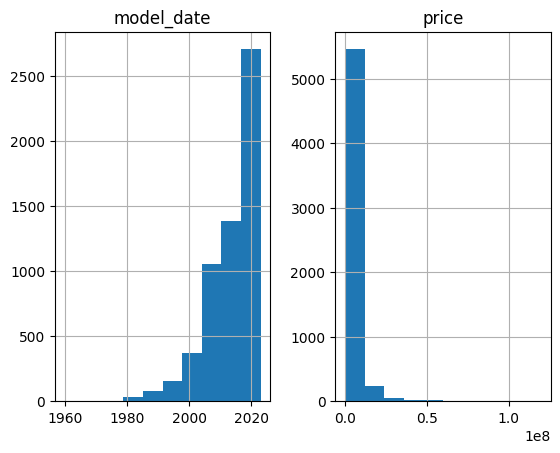

In [ ]:
df.hist()

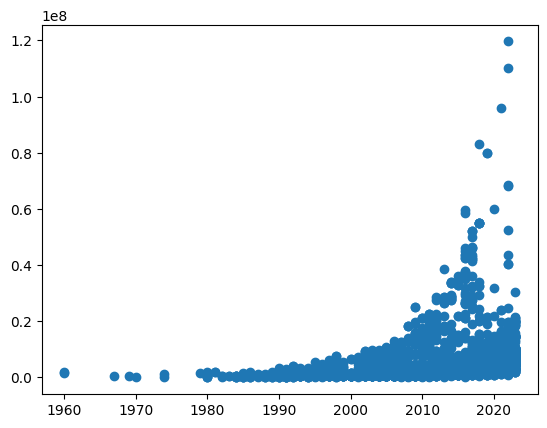

In [ ]:
price = df['price']
year = df['model_date']
plt.plot(year, price, linestyle="none", marker="o")

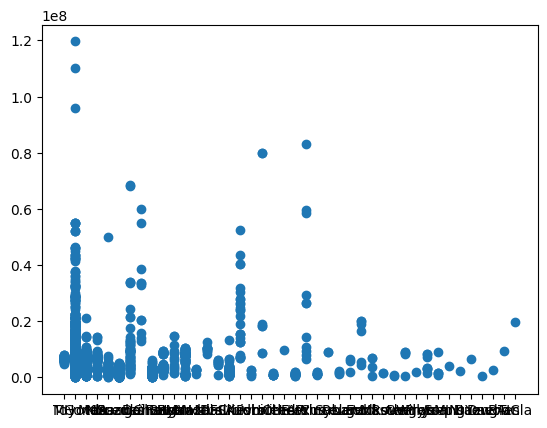

In [ ]:
plt.plot(df['manufacturer'], price, linestyle = 'none', marker = 'o')

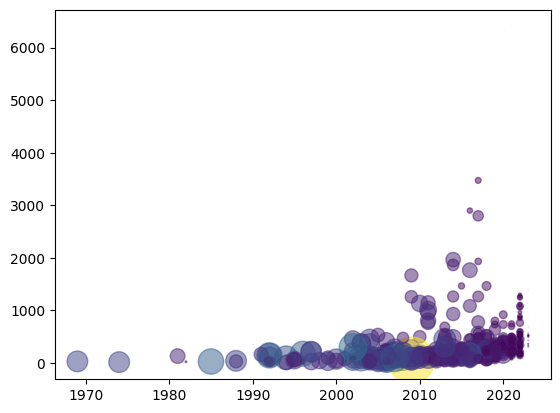

In [ ]:
def replaceMileage(df1):
    mileage = []
    for x in df1['mileage_from_odometer']:
        s = x.replace(',', '')
        s = s.replace('km', '')
        s = s.strip()
        mileage.append((float)(s))
    return mileage

dfSample = df.sample(frac = 0.1)
mileage = replaceMileage(dfSample)
mileage = np.array(mileage)
colors = 0.04 * mileage
plt.scatter(dfSample['model_date'], dfSample['price'] / 15000, s = mileage / 900, c = colors, alpha = 0.5)

<BarContainer object of 6 artists>

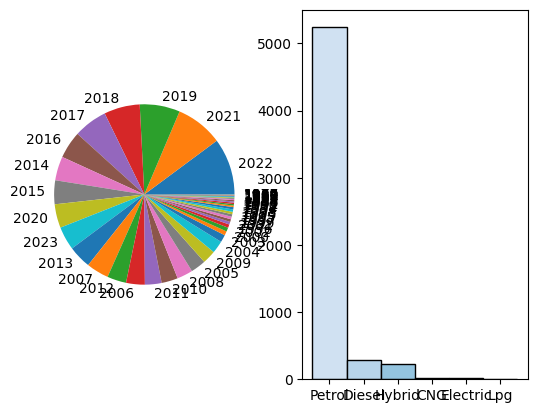

In [ ]:
v1 = df['model_date'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(v1, labels = v1.index)
v2 = df['fuel_type'].value_counts()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(v2)))
plt.subplot(1, 2, 2)
plt.bar(v2.index, v2, edgecolor = 'black', width = 1, color = colors)

([<matplotlib.patches.Wedge at 0x7fe3b4177bb0>,
 [Text(-0.41957228680766073, 1.0168377924442964, 'Automatic'),
  Text(0.41957219160443343, -1.0168378317274849, 'Manual')])

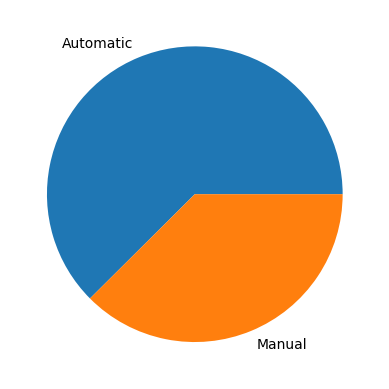

In [ ]:
v3 = df['vehicle_transmission'].value_counts()
plt.pie(v3, labels = v3.index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b40301c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b4030700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b4030040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b4030c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b4030ee0>],
 'means': []}

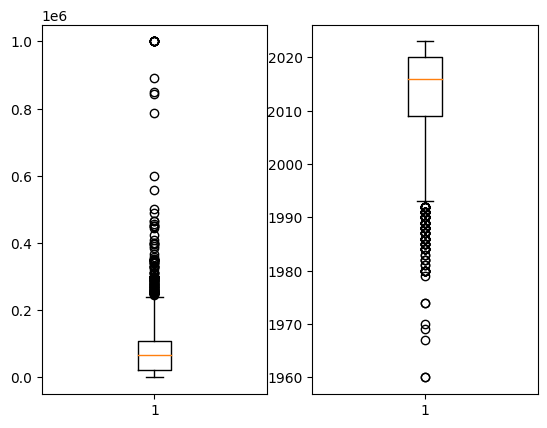

In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot(replaceMileage(df))
plt.subplot(1, 2, 2)
plt.boxplot(df['model_date'])

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.isna().sum()
df.describe()

,model_date,price
count,5788.000000,5.788000e+03
mean,2013.748963,4.520590e+06
std,7.973997,6.253574e+06
min,1960.000000,1.780000e+03
25%,2009.000000,1.673750e+06
50%,2016.000000,3.000000e+06
75%,2020.000000,5.000000e+06
max,2023.000000,1.196000e+08


In [ ]:
# drop duplicates rows
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(5788, 11)
(5117, 11)


In [ ]:
# remove the currency, description, item_condition, manufacturer and brand columns
dfRemColumns = df.drop(['currency', 'description', 'item_condition', 'manufacturer', 'brand'], axis = 1)
dfRemColumns.head()

,fuel_type,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,Petrol,"6,000 km",2021,6525000,1490cc,Automatic
1,Petrol,"68,000 km",2012,1625000,1000cc,Manual
2,Petrol,"150,000 km",2015,2550000,1300cc,Automatic
3,Petrol,"18,000 km",2022,9000000,3500cc,Automatic
4,Petrol,"110,000 km",2015,3350000,1300cc,Automatic


In [ ]:
encoder1 = LabelEncoder()
fuel_type = dfRemColumns['fuel_type']
fuel_type_encoded = encoder1.fit_transform(fuel_type)
encoder1.classes_

encoder2 = LabelEncoder()
vehicle_transmission = dfRemColumns['vehicle_transmission']
vehicle_transmission_encoded = encoder2.fit_transform(vehicle_transmission)
encoder2.classes_

# drop the original columns and add the encoded columns instead
dfEncoded = dfRemColumns.drop(['fuel_type', 'vehicle_transmission'], axis = 1)
dfEncoded['fuel_type_encoded'] = fuel_type_encoded
dfEncoded['vehicle_transmission_encoded'] = vehicle_transmission_encoded
dfEncoded.head()

,mileage_from_odometer,model_date,price,vehicle_engine,fuel_type_encoded,vehicle_transmission_encoded
0,"6,000 km",2021,6525000,1490cc,5,0
1,"68,000 km",2012,1625000,1000cc,5,1
2,"150,000 km",2015,2550000,1300cc,5,0
3,"18,000 km",2022,9000000,3500cc,5,0
4,"110,000 km",2015,3350000,1300cc,5,0


In [ ]:
# removes the 'cc' from the engine column
def removeCC(str):
    if not(str[0].isdigit()):
        return np.nan
    return (int)(str.replace('cc', ''))

# formats the mileage column to be a number
def formatKM(km):
    km = km.replace('km', '')
    km = km.replace(',', '')
    km = km.strip()
    return (int)(km)

# apply the functions to the columns
dfNumeric = dfEncoded.copy()
dfNumeric['vehicle_engine'] = dfNumeric['vehicle_engine'].apply(removeCC)
dfNumeric['mileage_from_odometer'] = dfNumeric['mileage_from_odometer'].apply(formatKM)
dfNumeric.head()

,mileage_from_odometer,model_date,price,vehicle_engine,fuel_type_encoded,vehicle_transmission_encoded
0,6000,2021,6525000,1490.0,5,0
1,68000,2012,1625000,1000.0,5,1
2,150000,2015,2550000,1300.0,5,0
3,18000,2022,9000000,3500.0,5,0
4,110000,2015,3350000,1300.0,5,0


In [ ]:
print(dfNumeric.isna().sum())
print(dfNumeric.shape)
dfNumeric.dropna(inplace = True)
print(dfNumeric.shape)

mileage_from_odometer            0
model_date                       0
price                            0
vehicle_engine                  10
fuel_type_encoded                0
vehicle_transmission_encoded     0
dtype: int64
(5117, 6)
(5107, 6)


In [ ]:
dfNumeric[dfNumeric['model_date'] < 1998].count()
dfNumeric['mileage_from_odometer'].describe()
dfOutliers = dfNumeric[dfNumeric['model_date'] >= 1998]
dfOutliers = dfOutliers[(dfOutliers['mileage_from_odometer'] >= 10000) & (dfOutliers['mileage_from_odometer'] <= 500000)]
dfOutliers['mileage_from_odometer'].describe()

count      4059.000000
mean      88707.251047
std       59713.956962
min       10000.000000
25%       45000.000000
50%       80000.000000
75%      120000.000000
max      500000.000000
Name: mileage_from_odometer, dtype: float64

In [ ]:
scaler = StandardScaler()

dfStandard = pd.DataFrame(scaler.fit_transform(dfOutliers), columns = dfOutliers.columns)
dfStandard.head()

,mileage_from_odometer,model_date,price,vehicle_engine,fuel_type_encoded,vehicle_transmission_encoded
0,-0.346817,-0.293569,-0.456630,-0.598280,0.275229,1.242269
1,1.026566,0.217407,-0.280577,-0.209143,0.275229,-0.804978
2,-1.184245,1.409684,0.947041,2.644527,0.275229,-0.804978
3,0.356623,0.217407,-0.128314,-0.209143,0.275229,-0.804978
4,0.189137,-1.656171,-0.566069,-0.598280,0.275229,-0.804978


In [ ]:
dfStandard.to_csv('UsedCarsClean.csv')